### Step 1 : Load and Explore the Data

In [3]:
#Importing Dependencies
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Models
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings('ignore')

url = 'https://docs.google.com/spreadsheets/d/1RRs3Df-RqmM7lbNUOOx4uRwKNMRHquUf/export?format=csv&gid=661986139'

# Load the CSV file while skipping bad lines
df = pd.read_csv(url, on_bad_lines='skip')

# Check the shape and the first few rows
print(df.shape)
df.head()

(509, 22)


,year,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6
2,Jun-1982,1160.0,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.7,...,506.9,350.8,3561.5,1192.7,655.6,361.9,486.4,504.7,345.9,3547.0
3,Jul-1982,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.4,...,503.7,341.5,3553.9,1203.2,656.6,361.6,488.6,505.4,345.4,3560.6
4,Aug-1982,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.7,659.8,...,506.0,342.7,3581.8,1213.5,656.5,361.9,489.8,505.6,346.4,3573.6


In [6]:
df.dtypes

,0
year,object
Original_Food retailing,float64
Original_ Household goods retailing,float64
"Original_Clothing, footwear and personal accessory retailing",float64
Original_Department stores,float64
Original_ Other retailing,float64
"Original_Cafes, restaurants and takeaway food services",float64
Original_Total (Industry),float64
Seasonally_Food retailing,float64
Seasonally_Household goods retailing,float64


In [7]:
# Convert the year column into date format
df['year'] = pd.to_datetime(df['year'], format='%b-%Y').dt.year

**1. Understanding the Data**
The dataset contains various columns related to retailing across different categories, such as:

- Original: Raw data values.
- Seasonally: Adjusted for seasonal effects.
- Trend: Long-term trends in the data.
- Turnover: Total revenue for specific sectors.

In [8]:
#Checking Null Values
df.isnull().sum()

,0
year,0
Original_Food retailing,0
Original_ Household goods retailing,0
"Original_Clothing, footwear and personal accessory retailing",0
Original_Department stores,0
Original_ Other retailing,0
"Original_Cafes, restaurants and takeaway food services",0
Original_Total (Industry),0
Seasonally_Food retailing,0
Seasonally_Household goods retailing,0


**Trend categories has 28 missing values so instead of deleting the records , creating a seperate DataFrame for Trend_ categories**

In [9]:
df.columns

Index(['year', 'Original_Food retailing',
       'Original_ Household goods retailing',
       'Original_Clothing, footwear and personal accessory retailing',
       'Original_Department stores', 'Original_ Other retailing',
       'Original_Cafes, restaurants and takeaway food services',
       'Original_Total (Industry)', 'Seasonally_Food retailing',
       'Seasonally_Household goods retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing',
       'Seasonally_Department stores', 'Seasonally_Other retailing',
       'Seasonally_Cafes, restaurants and takeaway food services',
       'Seasonally_Total (Industry)',
       'Turnover ;  Total (State) ;  Food retailing ;',
       'Trend_Household goods retailing',
       'Trend_Clothing, footwear and personal accessory retailing',
       'Trend_Department stores', 'Trend_Other retailing',
       'Trend_Cafes, restaurants and takeaway food services',
       'Trend_Total (Industry)'],
      dtype='object')

In [10]:
# Strip whitespace from column names
df=df.rename(columns={
       'Original_Food retailing':'Original_Food_retailing',
       'Original_ Household goods retailing':'Original_Household_goods_retailing',
       'Original_Clothing, footwear and personal accessory retailing':'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department stores':'Original_Department_stores',
    'Original_ Other retailing':'Original_Other_retailing',
       'Original_Cafes, restaurants and takeaway food services':'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total (Industry)':'Original_Total_Industry',
       'Seasonally_Food retailing':'Seasonally_Food_retailing',
       'Seasonally_Household goods retailing':'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing':'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department stores':'Seasonally_Department_stores',
    'Seasonally_Other retailing':'Seasonally_Other_retailing',
       'Seasonally_Cafes, restaurants and takeaway food services':'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total (Industry)': 'Seasonally_Total_Industry',
       'Turnover ;  Total (State) ;  Food retailing ;':'Trend_Food_retailing',
       'Trend_Household goods retailing':'Trend_Household_goods_retailing',
       'Trend_Clothing, footwear and personal accessory retailing':'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department stores':'Trend_Department_stores',
       'Trend_Other retailing':'Trend_Other_retailing',
       'Trend_Cafes, restaurants and takeaway food services':'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total (Industry)':  'Trend_Total(Industry)'
       })
print(df.columns)
df.head(2)

Index(['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry', 'Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)'],
      dtype='object')


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [11]:
main_df = df.copy()
print(main_df.shape)

(509, 22)


In [12]:
#Create Clean DataFrame , Remove Null values
main_df= main_df.dropna()
main_df.shape

(481, 22)

In [13]:
main_df.tail()

,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
504,2024,13749.8,5195.6,2807.9,1728.6,5213.8,5325.3,34020.9,14285.9,5689.7,...,5611.4,5398.8,35811.4,14330.6,5710.9,2979.3,1886.0,5586.1,5390.3,35883.3
505,2024,14189.2,5510.7,3021.8,1806.4,5535.7,5391.6,35455.4,14383.1,5755.8,...,5621.1,5388.4,36002.2,14371.7,5743.4,2985.1,1887.4,5623.3,5393.6,36004.6
506,2024,13699.6,5841.5,2917.2,1859.0,5333.5,5115.3,34766.2,14420.0,5818.8,...,5671.4,5385.6,36187.1,14415.7,5773.6,2992.5,1889.1,5661.0,5397.2,36129.1
507,2024,14115.7,5565.5,2770.6,1746.4,5539.6,5431.5,35169.4,14447.2,5815.2,...,5679.5,5385.3,36207.3,14460.4,5798.4,3001.6,1891.4,5697.2,5401.8,36250.9
508,2024,14593.1,5596.6,2812.4,1699.7,5673.8,5554.8,35930.3,14530.7,5797.6,...,5753.0,5437.2,36474.7,14504.8,5826.5,3008.4,1893.8,5735.2,5407.9,36376.4


In [14]:
main_df.isnull().sum()

,0
year,0
Original_Food_retailing,0
Original_Household_goods_retailing,0
Original_Clothing_footwear__personal_accessory_retailing,0
Original_Department_stores,0
Original_Other_retailing,0
Original_Cafes_restaurants_takeaway_food_services,0
Original_Total_Industry,0
Seasonally_Food_retailing,0
Seasonally_Household_goods_retailing,0


Our Data is clean and ready to process for Machine Learning Models

In [15]:
main_df['year'].dtypes

dtype('int32')

In [16]:
#Step 1: Normalize /  Standardization the data
s_df = main_df.copy()

# Identify numeric columns (excluding datetime columns)
numeric_cols = s_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numeric columns
s_df[numeric_cols] = scaler.fit_transform(s_df[numeric_cols])

# Check the transformed DataFrame
s_df.head(2)

,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,-1.278397,-1.365391,-1.251738,-1.435592,-1.277819,-1.202613,-1.310552,-1.285302,-1.356190,...,-1.288190,-1.201811,-1.319044,-1.283580,-1.355938,-1.327036,-1.841625,-1.290202,-1.203081,-1.318189
1,1982,-1.281603,-1.340480,-1.214017,-1.351766,-1.272500,-1.202839,-1.299091,-1.282129,-1.359408,...,-1.292554,-1.204453,-1.318021,-1.281234,-1.355115,-1.328091,-1.836914,-1.290358,-1.204063,-1.317016


**Model: Time Series Forecasting Using LSTM**

LSTM (Long Short-Term Memory) is chosen for time series forecasting due to its ability to learn long-term dependencies, making it suitable for sequential data like retail turnover.

MODEL ATTEMPT 1. LSTM MODEL SPECIFYING SPLIT IN YEARS BETWEEN TRAINING DATA AND TEST **DATA**

In [79]:
# Convert 'year' to datetime format and set as index
print(s_df['year'].unique())

[1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2022 2023 2024]


In [88]:
s_df['year'] = pd.to_datetime(s_df['year'], errors='coerce', format='%Y').combine_first(
    pd.to_datetime(s_df['year'], errors='coerce', format='%b-%Y')
)

s_df = s_df.set_index('year')

In [89]:
print(s_df.columns)

Index(['Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry', 'Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)', 'date'],
      dtype='object')


In [90]:
#Univariate LSTM Model Implementation

# Specify the target column
target_column = 'Seasonally_Food_retailing'

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(s_df[[target_column]])

In [91]:
# Create a DataFrame from scaled data for easier date filtering
scaled_data_df = pd.DataFrame(scaled_data, index=s_df.index, columns=[target_column])

In [206]:
# Specify your desired training and testing date ranges

train_start_date = '1982-04-01'
train_end_date = '2016-10-01'
test_start_date = '2016-11-01'
test_end_date = '2024-08-01'

In [207]:
print(scaled_data_df.index)
print(scaled_data_df.index.dtype)

DatetimeIndex(['1982-01-01', '1982-01-01', '1982-01-01', '1982-01-01',
               '1982-01-01', '1982-01-01', '1982-01-01', '1982-01-01',
               '1982-01-01', '1983-01-01',
               ...
               '2023-01-01', '2023-01-01', '2024-01-01', '2024-01-01',
               '2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01',
               '2024-01-01', '2024-01-01'],
              dtype='datetime64[ns]', name='year', length=481, freq=None)
datetime64[ns]


In [208]:
# Filter the scaled data based on specified date ranges
train_data = scaled_data_df[train_start_date:train_end_date]
test_data = scaled_data_df[test_start_date:test_end_date]

In [209]:
# Create sequences for the training and testing datasets
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # Predicting the target column
    return np.array(X), np.array(y)

time_steps = 24  # For example, using the future 24 months
X_train, y_train = create_sequences(train_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

In [210]:
#Print X_train shape
print("X_train shape:", X_train.shape)


X_train shape: (384, 24, 1)


In [211]:
#Print X_train shape
print("X_test shape:", X_test.shape)


X_test shape: (40, 24, 1)


In [212]:
# Reshape X_train and X_test for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [213]:
# Build the LSTM model with hyperparameter tuning and dropout

model = keras.Sequential([
    layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(50, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [214]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0562 - mae: 0.1947 - val_loss: 0.0794 - val_mae: 0.2802
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0098 - mae: 0.0829 - val_loss: 0.0205 - val_mae: 0.1423
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0060 - mae: 0.0585 - val_loss: 0.0068 - val_mae: 0.0822
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0030 - mae: 0.0443 - val_loss: 3.0355e-04 - val_mae: 0.0159
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0025 - mae: 0.0357 - val_loss: 0.0076 - val_mae: 0.0837
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0016 - mae: 0.0274 - val_loss: 6.8890e-04 - val_mae: 0.0246
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0011 - mae: 0.0251 - val_loss: 1.5168e-04 - val_mae: 0.0095
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0014 - mae: 0.0262 - val_loss: 0.0048 - val_mae: 0.0665
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36

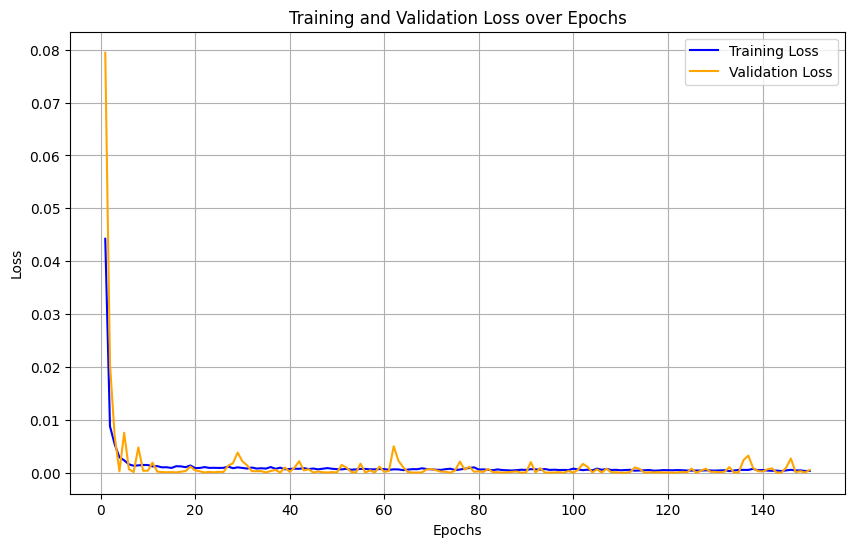

In [215]:
# Training and Validation Loss over epochs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

The low training loss and MAE indicate that the model has learned the training data well.
The validation loss and MAE are slightly higher than the training metrics, which is expected. If the validation metrics were significantly worse than the training metrics, it could indicate overfitting, where the model performs well on training data but poorly on unseen data.
Overall, these results suggest that the model is performing well, but further evaluation on a test dataset would be necessary to confirm its generalization ability.

In [216]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions to original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step


In [217]:
# Evaluate the model
mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1034.5476953124996
Mean Squared Error: 1484392.327026731
R-squared: 0.15597195085541404


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


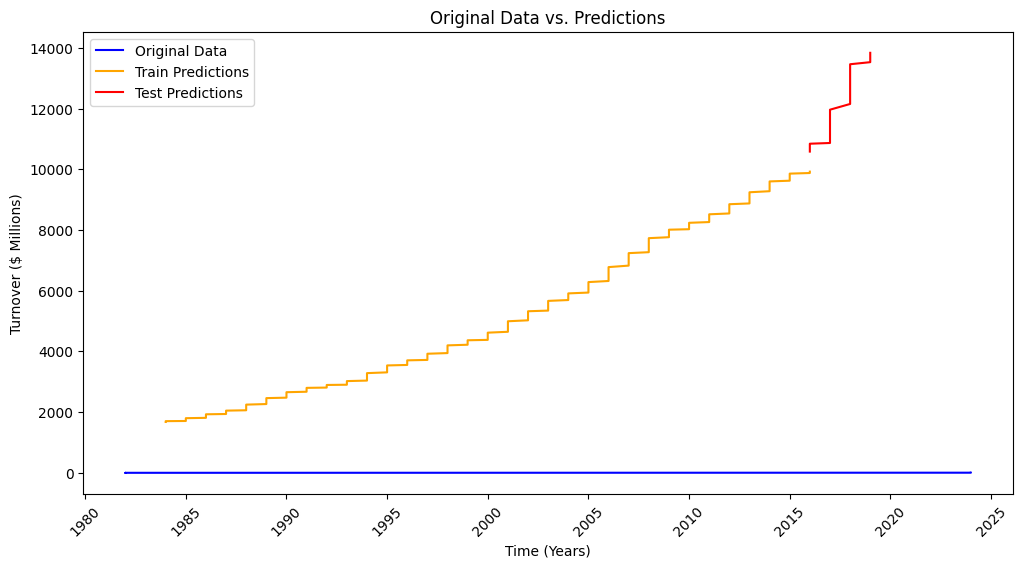

In [220]:
# scaled_values are the normalized data used for training and testing
scaled_values = scaler.transform(s_df[[target_column]])  # Normalize the original data for plotting

# Prepare predictions for plotting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get them back to original scale
train_predict_rescaled = scaler.inverse_transform(train_predict)
test_predict_rescaled = scaler.inverse_transform(test_predict)

# Prepare the full dataset for original values
original_data = scaler.inverse_transform(scaled_values)

# Create a time index based on the DataFrame's index
time_index = s_df.index

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time_index, original_data, label='Original Data', color='blue')
plt.plot(time_index[time_steps:time_steps + len(train_predict_rescaled)], train_predict_rescaled, label='Train Predictions', color='orange')
plt.plot(time_index[time_steps + len(train_predict_rescaled):time_steps + len(train_predict_rescaled) + len(test_predict_rescaled)], test_predict_rescaled, label='Test Predictions', color='red')
plt.legend()
plt.title('Original Data vs. Predictions')
plt.xlabel('Time (Years)')
plt.ylabel('Turnover ($ Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**ANALYSIS**

The MAE indicates a significant average error in predictions.
The MSE, being quite high, suggests that there are large errors in some predictions, possibly due to outliers.
The low R-squared value indicates that the model does not explain much of the variance in the target variable, suggesting that it may not be capturing the underlying patterns in the data effectively.
These results imply that the model may need improvement, potentially through feature engineering, using different algorithms, or tuning hyperparameters.

**MODEL 2 ATTEMPT WITH SOME OPTIMISATION**

In [114]:
#Optimised Univariate LSTM Model Implementation

# Specify the target column
target_column = 'Seasonally_Food_retailing'

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(s_df[[target_column]])

In [115]:
# Create a DataFrame from scaled data for easier date filtering
scaled_data_df = pd.DataFrame(scaled_data, index=s_df.index, columns=[target_column])

In [140]:
# Specify your desired training and testing date ranges

train_start_date = '1982-04-01'
train_end_date = '2015-10-01'
test_start_date = '2015-11-01'
test_end_date = '2024-08-01'

In [141]:
# Filter the scaled data based on specified date ranges
train_data = scaled_data_df[train_start_date:train_end_date]
test_data = scaled_data_df[test_start_date:test_end_date]

In [142]:
# Create sequences for the training and testing datasets
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # Predicting the target column
    return np.array(X), np.array(y)

time_steps = 36  # For example, using the future 36 months
X_train, y_train = create_sequences(train_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

In [143]:
# Reshape X_train and X_test for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [168]:
# Build the advanced LSTM model (Bidirectional LSTMs and Stacked LSTMs)
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(50)),  # Stacked LSTM layer
    layers.Dropout(0.2),
    layers.Dense(1)  # Output layer for regression
])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [178]:
# Train the model
history = model.fit(X_train, y_train, epochs=125, batch_size=32, validation_split=0.2)

Epoch 1/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 1.0267e-04 - mae: 0.0068 - val_loss: 0.0012 - val_mae: 0.0334
Epoch 2/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 8.0189e-05 - mae: 0.0068 - val_loss: 4.6168e-05 - val_mae: 0.0057
Epoch 3/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 1.1630e-04 - mae: 0.0078 - val_loss: 0.0012 - val_mae: 0.0329
Epoch 4/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 1.0138e-04 - mae: 0.0077 - val_loss: 2.0828e-04 - val_mae: 0.0131
Epoch 5/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.1312e-04 - mae: 0.0074 - val_loss: 2.2224e-04 - val_mae: 0.0136
Epoch 6/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 1.2125e-04 - mae: 0.0080 - val_loss: 5.7905e-04 - val_mae: 0.0231
Epoch 7/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 7.7687e-05 - mae: 0.0062 - val_loss: 8.1733e-04 - val_mae: 0.0277
Epoch 8/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.4653e-05 - mae: 0.0063 - val_loss: 4.4868e-04 - val_mae: 0.0202
Epoch 9/125
9

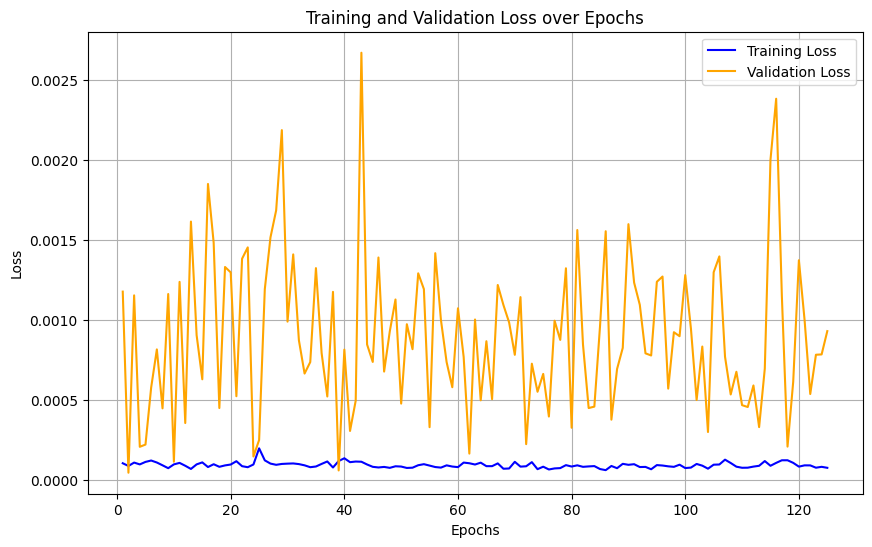

In [179]:
# Training and Validation Loss over epochs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [180]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions to original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [181]:
# Evaluate the model
mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.13399917084728732
Mean Squared Error: 0.0241582276775032
R-squared: 0.8195625273484578


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


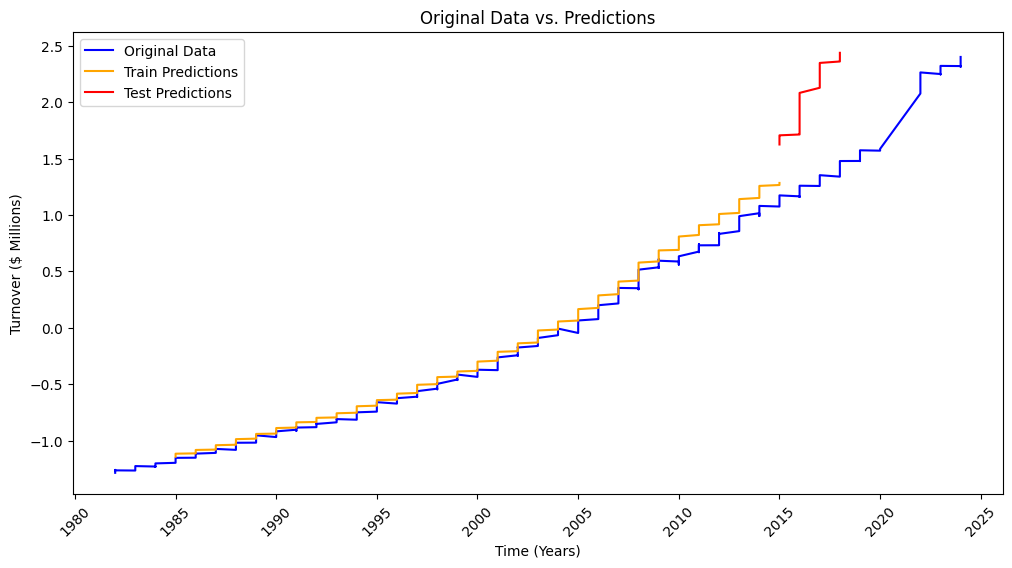

In [173]:
# scaled_values are the normalized data used for training and testing
scaled_values = scaler.transform(s_df[[target_column]])  # Normalize the original data for plotting

# Prepare predictions for plotting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get them back to original scale
train_predict_rescaled = scaler.inverse_transform(train_predict)
test_predict_rescaled = scaler.inverse_transform(test_predict)

# Prepare the full dataset for original values
original_data = scaler.inverse_transform(scaled_values)

# Create a time index based on the DataFrame's index
time_index = s_df.index

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time_index, original_data, label='Original Data', color='blue')
plt.plot(time_index[time_steps:time_steps + len(train_predict_rescaled)], train_predict_rescaled, label='Train Predictions', color='orange')
plt.plot(time_index[time_steps + len(train_predict_rescaled):time_steps + len(train_predict_rescaled) + len(test_predict_rescaled)], test_predict_rescaled, label='Test Predictions', color='red')
plt.legend()
plt.title('Original Data vs. Predictions')
plt.xlabel('Time (Years)')
plt.ylabel('Turnover ($ Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**ANALYSIS**

The second set of metrics indicates a significantly better-performing model compared to the first set. The lower MAE and MSE values suggest that the predictions are much more accurate, and the higher R² value indicates that the model explains a substantial amount of the variance in the data.
Overall, the second model appears to be much more effective in predicting the target variable than the first model. However there is room for improvement

ATTEMPT 3 - BUILD STML MODEL USING RANDOM SPLIT BETWEEN TRAIN AND TEST **DATA**

In [196]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(main_df[['Seasonally_Food_retailing']])

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_step=1)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predictions
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1775
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1426  
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0914  
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0530 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114  
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0385e-04
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1313e-04
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

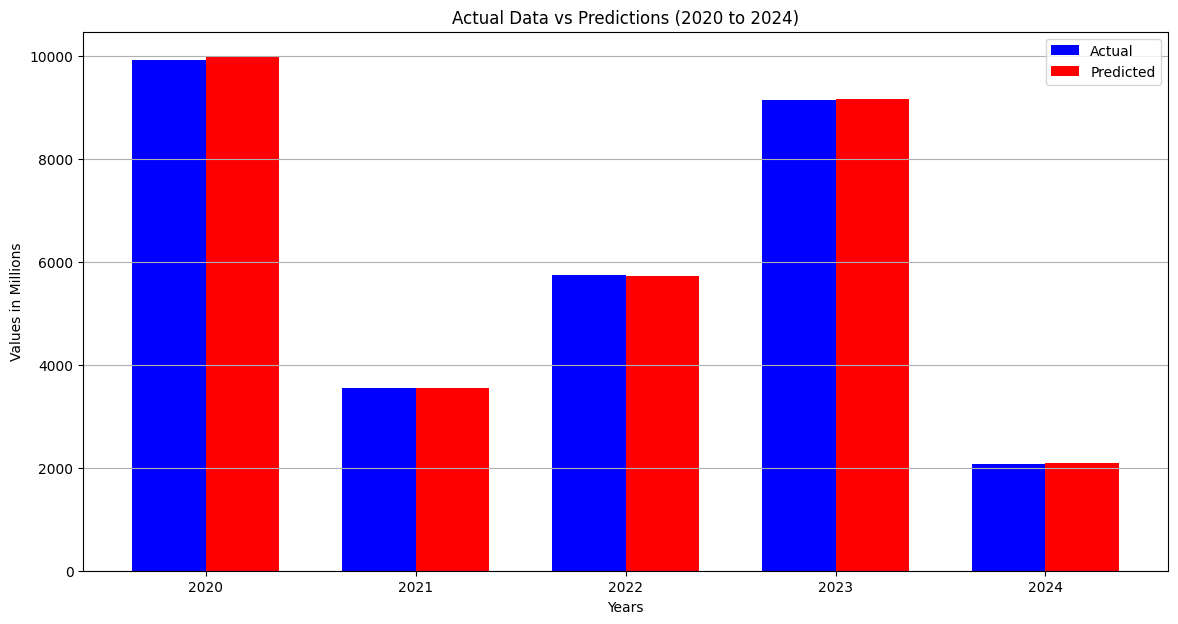

In [204]:
# Visualise Actual Data Vs Predictions

start_year = 2016
num_years = len(y_test_inverse)  # Number of years based on the length of the test data

# Create a list of years for the x-axis
years = [start_year + i for i in range(num_years)]

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({
    'Year': years,
    'Actual': y_test_inverse.flatten(),
    'Predicted': y_pred_inverse.flatten()
})

# Filter the results to include only the years 2020 to 2024
results_filtered = results[(results['Year'] >= 2020) & (results['Year'] <= 2024)]

# Set the bar width
bar_width = 0.35
index = np.arange(len(results_filtered))

# Plotting the results as a bar chart
plt.figure(figsize=(14, 7))
bar1 = plt.bar(index, results_filtered['Actual'], bar_width, label='Actual', color='blue')
bar2 = plt.bar(index + bar_width, results_filtered['Predicted'], bar_width, label='Predicted', color='red')

# Adding labels and title
plt.title('Actual Data vs Predictions (2020 to 2024)')
plt.xlabel('Years')
plt.ylabel('Values in Millions')
plt.xticks(index + bar_width / 2, results_filtered['Year'])  # Set x-ticks to be the years
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()

**ANALYSIS**

The very low MSE and MAE values indicate that the model's predictions are highly accurate and that the errors are minimal.
The R² value close to 1 suggests that the model explains nearly all the variability in the target variable, indicating a strong fit to the data.
Overall, these results imply that the model is performing exceptionally well, making it a highly effective predictive model for the given dataset.

ATTEMPT 4 - RANDOM SPLIT BETWEEN TRAINING AND TESTING DATA WITH SOME **OPTIMISATION**

In [31]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(s_df[['Seasonally_Food_retailing']])

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_step=1)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the advanced LSTM model (Bidirectional LSTMs and Stacked LSTMs)

model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(50)),  # Stacked LSTM layer
    layers.Dropout(0.2),
    layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# Predictions
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 0.1790 - val_loss: 0.1312
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1040 - val_loss: 0.0548
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0331 - val_loss: 0.0238
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0230 - val_loss: 0.0185
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - val_loss: 0.0126
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0101 - val_loss: 0.0066
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029 - val_loss: 6.1194e-04
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 3.6788e-04
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 5.1301e-04
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011 - val_loss: 6.2098e-04
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━

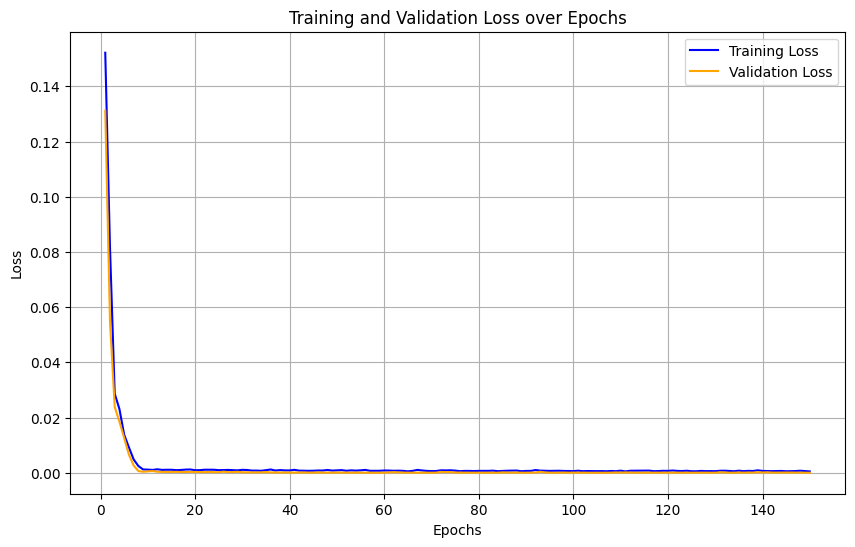

In [32]:
# Training and Validation Loss over epochs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

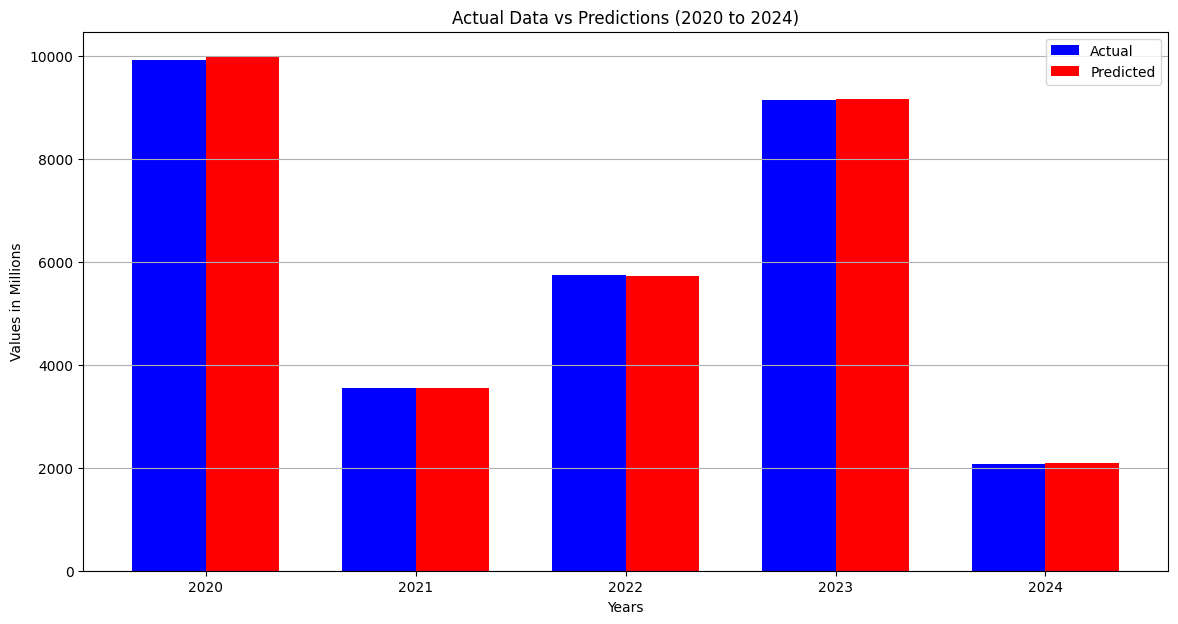

In [205]:
# Visualise Actual Data Vs Predictions

start_year = 2016
num_years = len(y_test_inverse)  # Number of years based on the length of the test data

# Create a list of years for the x-axis
years = [start_year + i for i in range(num_years)]

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({
    'Year': years,
    'Actual': y_test_inverse.flatten(),
    'Predicted': y_pred_inverse.flatten()
})

# Filter the results to include only the years 2020 to 2024
results_filtered = results[(results['Year'] >= 2020) & (results['Year'] <= 2024)]

# Set the bar width
bar_width = 0.35
index = np.arange(len(results_filtered))

# Plotting the results as a bar chart
plt.figure(figsize=(14, 7))
bar1 = plt.bar(index, results_filtered['Actual'], bar_width, label='Actual', color='blue')
bar2 = plt.bar(index + bar_width, results_filtered['Predicted'], bar_width, label='Predicted', color='red')

# Adding labels and title
plt.title('Actual Data vs Predictions (2020 to 2024)')
plt.xlabel('Years')
plt.ylabel('Values in Millions')
plt.xticks(index + bar_width / 2, results_filtered['Year'])  # Set x-ticks to be the years
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()

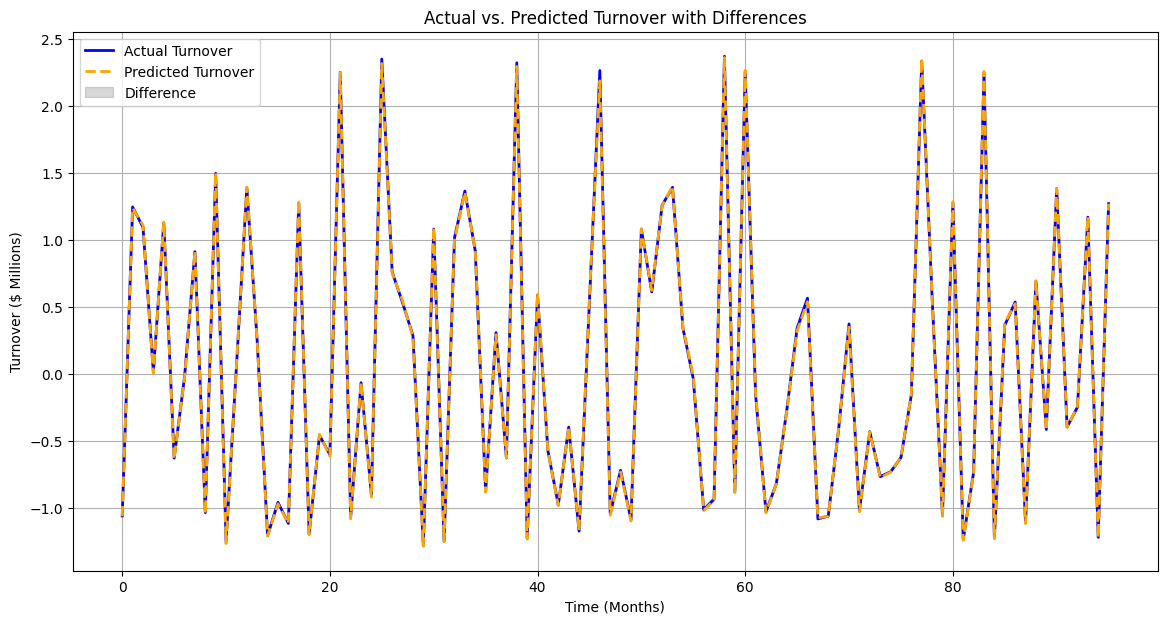

In [39]:
#Show Actual Data vs. Predictions with differences
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(14, 7))

# Create an array of indices for the x-axis (time)
x_values = np.arange(len(y_test_inverse))

# Plot actual values
plt.plot(x_values, y_test_inverse, label='Actual Turnover', color='blue', linewidth=2)

# Plot predicted values
plt.plot(x_values, y_pred_inverse, label='Predicted Turnover', color='orange', linestyle='--', linewidth=2)

# Fill between the actual and predicted
plt.fill_between(x_values, y_test_inverse.flatten(), y_pred_inverse.flatten(),
                 color='gray', alpha=0.3, label='Difference')

# Adding titles and labels
plt.title('Actual vs. Predicted Turnover with Differences')
plt.xlabel('Time (Months)')
plt.ylabel('Turnover ($ Millions)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

**ANALYSIS**

There is no much difference between attempt 4 and attempt 3. The very low MSE and MAE values indicate that the model's predictions are highly accurate and that the errors are minimal.
The R² value close to 1 suggests that the model explains nearly all the variability in the target variable, indicating a strong fit to the data.
Overall, these results imply that the model is performing exceptionally well, making it a highly effective predictive model for the given dataset.

In [17]:
#RUNNING LSTM MODEL ON ALL categories
# List of categories
categories = [
    'Seasonally_Food_retailing',
    'Seasonally_Household_goods_retailing',
    'Seasonally_Clothing_footwear_personal_accessory_retailing',
    'Seasonally_Department_stores',
    'Seasonally_Other_retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services',
    'Seasonally_Total_Industry'
]

# Initialize a DataFrame to store results
lstm_results_df = pd.DataFrame(index=['MAE', 'MSE', 'R2', 'RMSE', '2024 Turnover', '2025 Prediction'], columns=categories)

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Loop through each category
for category in categories:
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(s_df[[category]])

    # Create sequences
    X, y = create_sequences(scaled_data, time_step=1)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluate the model
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    r2 = r2_score(y_test_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)

    # Store evaluation metrics
    lstm_results_df.loc['MAE', category] = f"{mae:.2f}"
    lstm_results_df.loc['MSE', category] = f"{mse:.2f}"
    lstm_results_df.loc['R2', category] = f"{r2:.2f}"
    lstm_results_df.loc['RMSE', category] = f"{rmse:.2f}"

    # Get the actual value for 2024 and store it
    if not main_df[main_df['year'] == 2024].empty:
        actual_2024_value = main_df.loc[main_df['year'] == 2024, category].values[0]
        lstm_results_df.loc['2024 Turnover', category] = f"{actual_2024_value:.2f}"
    else:
        lstm_results_df.loc['2024 Turnover', category] = 'No data'

    # Predict for 2025 (using the last known value)
    last_value = scaled_data[-1]
    future_years = np.array([[last_value[0]]]).reshape(1, 1, 1)
    predicted_value = model.predict(future_years)
    lstm_results_df.loc['2025 Prediction', category] = f"{scaler.inverse_transform(predicted_value)[0][0]:.2f}"

# Create a mapping of long column names to shorter names
name_mapping = {
    'Seasonally_Food_retailing': 'Food Retailing',
    'Seasonally_Household_goods_retailing': 'Household Goods',
    'Seasonally_Clothing_footwear_personal_accessory_retailing': 'Clothing & Accessories',
    'Seasonally_Department_stores': 'Department Stores',
    'Seasonally_Other_retailing': 'Other Retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services': 'Cafes & Restaurants',
    'Seasonally_Total_Industry': 'Total Industry'
}

# Rename the columns in the results DataFrame
lstm_results_df.rename(columns=name_mapping, inplace=True)

# Display the results DataFrame
print("LSTM Model Evaluation Matrics for Seasonally Adjusted Data")
lstm_results_df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
LSTM Model Evaluation Matrics for Seasonally Adjusted Data


,Food Retailing,Household Goods,Clothing & Accessories,Department Stores,Other Retailing,Cafes & Restaurants,Total Industry
MAE,0.01,0.03,0.04,0.08,0.03,0.02,0.01
MSE,0.00,0.00,0.01,0.02,0.00,0.00,0.00
R2,1.00,1.00,0.99,0.98,1.00,1.00,1.00
RMSE,0.01,0.06,0.08,0.16,0.03,0.03,0.02
2024 Turnover,14237.20,5753.80,2948.40,1878.10,5529.80,5379.00,35726.10
2025 Prediction,2.41,2.21,2.76,1.95,2.79,2.67,2.49
